<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/CnnAug_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import classification_report


## 1- importer les bibliothéques

In [2]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam

## 2- fixer les path des données augmenter 

In [3]:

from google.colab import drive
drive.mount('/content/drive')
sj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped'
sj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_zoom'
sj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation'
sj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_translation'
sj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_distortion'
sj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_distortion'
sj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation_translation'

nsj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped'
nsj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_zoom'
nsj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation'
nsj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_translation'
nsj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_distortion'
nsj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation_translation'

Mounted at /content/drive


In [4]:
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

## Mise en Forme des images

In [5]:

def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [6]:
sj_original=mise_tenseur(sj_path,64,64,1)
nsj_original=mise_tenseur(nsj_path,64,64,1)

In [7]:
flipped_data= mise_tenseur(sj_fliped, 64, 64,1)
zoom_data=mise_tenseur(sj_zoom,64,64,1)
rotate_data=mise_tenseur(sj_rotation,64,64,1)
translate_data=mise_tenseur(sj_translation,64,64,1)
distortion_data=mise_tenseur(sj_distortion,64,64,1)
flip_dist_data=mise_tenseur(sj_flip_distortion,64,64,1)
rot_trans_flip_data=mise_tenseur(sj_rot_trans_flip,64,64,1)
rot_tran=mise_tenseur(sj_rot_tran,64,64,1)


In [8]:
sj_data = []
sj_data.extend(rotate_data)
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(translate_data)
sj_data.extend(distortion_data)
sj_data.extend(rot_trans_flip_data)
sj_data.extend(flip_dist_data)
sj_data.extend(rot_tran)

In [9]:
len(sj_data)

1955

In [10]:
flipped_data_nsj= mise_tenseur(nsj_fliped, 64, 64,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,64,64,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,64,64,1)
translate_data_nsj=mise_tenseur(nsj_translation,64,64,1)
distortion_data_nsj=mise_tenseur(nsj_distortion,64,64,1)
flip_dist_data_nsj=mise_tenseur(nsj_flip_distortion,64,64,1)
rot_trans_flip_data_nsj=mise_tenseur(nsj_rot_trans_flip,64,64,1)
rot_tran_nsj=mise_tenseur(nsj_rot_tran,64,64,1)


In [11]:
nsj_data = []
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(rot_trans_flip_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(distortion_data_nsj)
nsj_data.extend(translate_data_nsj)
nsj_data.extend(flip_dist_data_nsj)
nsj_data.extend(rot_tran_nsj)
len(nsj_data)

1980

In [12]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


3935


3935

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normaliser les données 
x_train = x_train.reshape(x_train.shape[0], 64,64, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 64,64, 1).astype('float32') / 255

# cnn

In [121]:
model = Sequential()
model.add(Conv2D(32,(11,11),padding='same',activation='relu', input_shape = (64,64,1)))

model.add(Conv2D(32, kernel_size = (7,7),padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32,padding='same', kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 64, 64, 32)        3904      
                                                                 
 conv2d_59 (Conv2D)          (None, 64, 64, 32)        50208     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        50208     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 8192)            

In [122]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [123]:
model.compile(optimizer=Adam(learning_rate=0.00001),loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',keras.metrics.Recall(),keras.metrics.Precision()])

In [124]:
H2 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=400, batch_size=32)

Epoch 1/400
99/99 [==============================] - 3s 22ms/step - loss: 0.6897 - accuracy: 0.5057 - recall_17: 0.0371 - precision_17: 0.5421 - val_loss: 0.6861 - val_accuracy: 0.5044 - val_recall_17: 0.0000e+00 - val_precision_17: 0.0000e+00
Epoch 2/400
99/99 [==============================] - 2s 17ms/step - loss: 0.6832 - accuracy: 0.5403 - recall_17: 0.1482 - precision_17: 0.6705 - val_loss: 0.6736 - val_accuracy: 0.6595 - val_recall_17: 0.3923 - val_precision_17: 0.8315
Epoch 3/400
99/99 [==============================] - 2s 17ms/step - loss: 0.6689 - accuracy: 0.6125 - recall_17: 0.3380 - precision_17: 0.7419 - val_loss: 0.6489 - val_accuracy: 0.6747 - val_recall_17: 0.4026 - val_precision_17: 0.8722
Epoch 4/400
99/99 [==============================] - 2s 17ms/step - loss: 0.6471 - accuracy: 0.6598 - recall_17: 0.4652 - precision_17: 0.7568 - val_loss: 0.6192 - val_accuracy: 0.7408 - val_recall_17: 0.6974 - val_precision_17: 0.7598
Epoch 5/400
99/99 [=============================

## Matrice de confusion


25/25 [==============================] - 0s 5ms/step


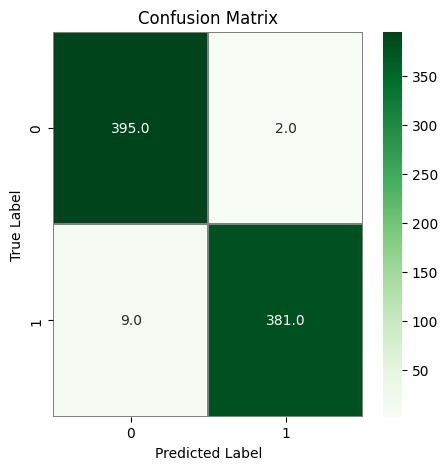

[[395   2]
 [  9 381]]


In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Générer des prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.where(y_pred>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [127]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       397
           1       0.99      0.98      0.99       390

    accuracy                           0.99       787
   macro avg       0.99      0.99      0.99       787
weighted avg       0.99      0.99      0.99       787



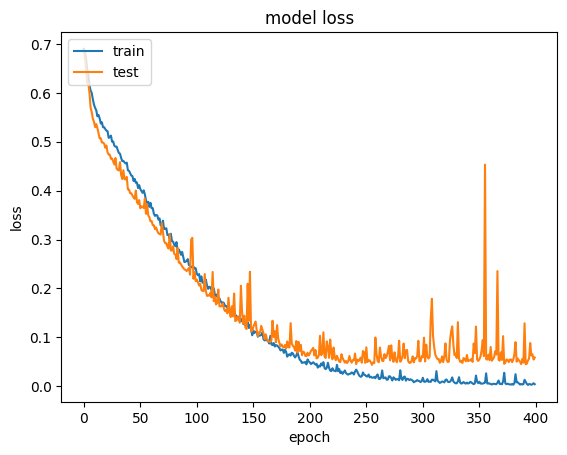

In [128]:
#loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()